<a href="https://www.kaggle.com/thirumani/shark-tank-india-analysis?scriptVersionId=87908302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/thirumani/shark-tank-india

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2022-Feb-15


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Check and import dataset

In [3]:
! ls -l /kaggle/input/shark-tank-india
shark_tank = pd.read_csv('/kaggle/input/shark-tank-india/Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 20
-rw-r--r-- 1 nobody nogroup 17292 Feb 15 14:21 'Shark Tank India.csv'

There are 117 rows and 46 columns in the dataset


## Exploratory Data Analysis (EDA)

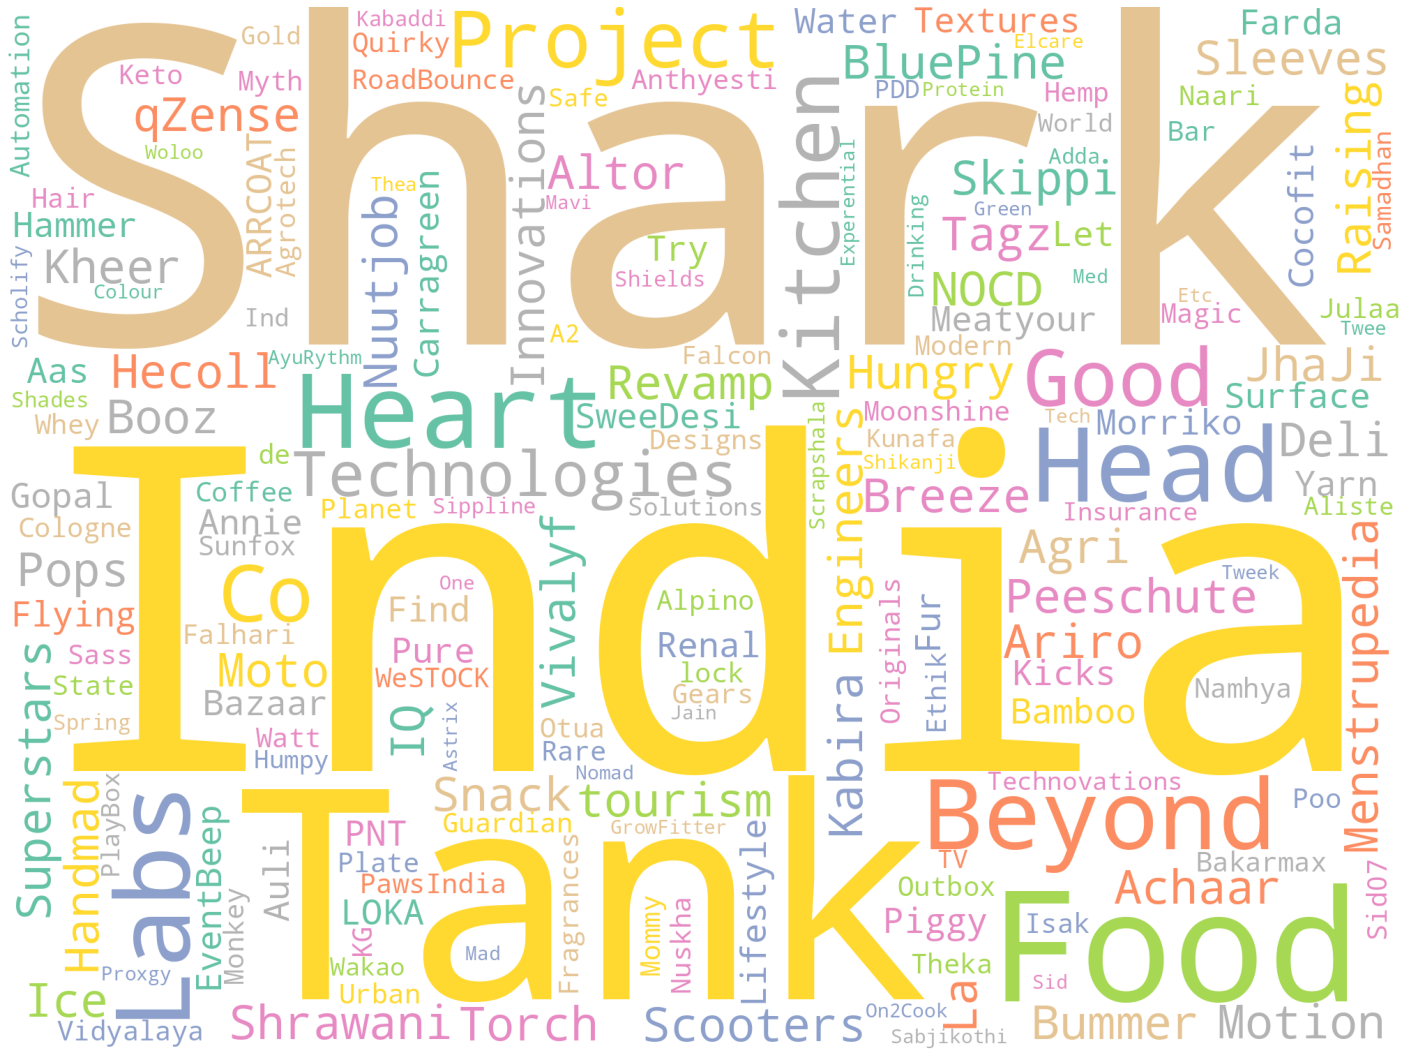

In [4]:
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
#print(text)
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width = 2000, height = 1500, stopwords=stop_words, background_color='white', colormap='Set2', collocations=False, random_state=2022).generate(text)
#wordcloud.to_file("Shark_Tank_India_title7.png")
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
shark_tank.head(5)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,3.0,2.0,1.0,NaN,NaN,95.0,800000.0,NaN,50.0,5.0,1000,1.0,1.0,75.0,16.00,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,1.0,1.0,NaN,NaN,NaN,4.0,40000.0,NaN,40.0,15.0,267,1.0,1.0,40.0,50.00,NaN,80.0,20.0,25.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.0,25.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,1.0,NaN,1.0,NaN,NaN,NaN,200000.0,NaN,25.0,10.0,250,1.0,1.0,25.0,30.00,NaN,83.0,0.0,0.00,NaN,0.0,0.0,NaN,12.5,15.0,NaN,12.5,15.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips,2.0,2.0,NaN,NaN,NaN,1200.0,NaN,48.0,70.0,1.0,7000,1.0,1.0,70.0,2.75,NaN,2545.0,70.0,2.75,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,4.0,1.0,3.0,NaN,NaN,30.0,NaN,NaN,50.0,5.0,1000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
shark_tank.tail(10).T

,107,108,109,110,111,112,113,114,115,116
Season Number,1,1,1,1,1,1,1,1,1,1
Episode Number,33,33,33,34,34,34,34,35,35,35
Episode Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pitch Number,108,109,110,111,112,113,114,115,116,117
Startup Name,Mavi's,Tweek Labs,Proxgy,Nomad Food Project,Twee in One,Green Protein,On2Cook,Jain Shikanji,Woloo,Elcare India
Industry,Food,Sports,Technology,Food,NaN,NaN,NaN,NaN,NaN,NaN
Business Description,Vegan Fermented Food,Sportswear,VR,Bacon Jams,Reversible and convertible clothing,Plant-Based Protein,Fastest Cooking Device,Lemonade,Washroom Finder,Carenting for Elders
Number of Presenters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male Presenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female Presenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
shark_tank.sample(10)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
116,1,35,NaN,117,Elcare India,NaN,Carenting for Elders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1,15,It's Time To Change,43,Hammer Lifestyle,Manufacturing,Smart Audio Products,3.0,3.0,NaN,NaN,NaN,1000.0,NaN,NaN,30.0,3.0,1000,1.0,1.0,100.0,40.0,NaN,250.0,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,40.00,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0
17,1,6,"New Week, New Ideas",18,Hecoll,Beauty/Fashion,Pollution Resistant Fabric,1.0,NaN,1.0,NaN,NaN,107.0,NaN,NaN,100.0,1.0,10000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,1,23,Investing In Innovation,75,Modern Myth,Beauty/Fashion,Bags,2.0,1.0,1.0,2019.0,Delhi,NaN,1400000.0,NaN,75.0,5.0,1500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1,7,A Never Give Up Spirit,19,Raising Superstars,Education,Child Development App,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,100.0,2.0,5000,1.0,1.0,100.0,4.0,NaN,2500.0,50.0,2.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,50.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
29,1,10,Passion About Entrepreneurship,30,EventBeep,Education,Student Community App EdTech,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,30.0,2.0,1500,1.0,1.0,30.0,3.0,NaN,1000.0,10.0,1.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,10.0,1.00,NaN,10.0,1.0,NaN,NaN,NaN,NaN,3.0
112,1,34,NaN,113,Green Protein,NaN,Plant-Based Protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1,22,Turning Ideas Into Businesses,69,Poo-de-Cologne,Beauty/Fashion,Toilet Spray with Essential Oils,1.0,NaN,1.0,NaN,Mumbai,NaN,75000.0,150.0,75.0,5.0,1500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1,35,NaN,115,Jain Shikanji,NaN,Lemonade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,40.0,30.0,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,3.0,2.0,1.0,NaN,NaN,95.0,800000.0,NaN,50.0,5.0,1000,1.0,1.0,75.0,16.0,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [8]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              117 non-null    int64  
 1   Episode Number             117 non-null    int64  
 2   Episode Title              91 non-null     object 
 3   Pitch Number               117 non-null    int64  
 4   Startup Name               117 non-null    object 
 5   Industry                   97 non-null     object 
 6   Business Description       117 non-null    object 
 7   Number of Presenters       91 non-null     float64
 8   Male Presenter             75 non-null     float64
 9   Female Presenter           48 non-null     float64
 10  Started in                 16 non-null     float64
 11  Pitchers Home City         21 non-null     object 
 12  Yearly Revenue             28 non-null     float64
 13  Monthly Sales              51 non-null     float64

In [9]:
shark_tank.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Season Number,117.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Episode Number,117.0,18.74,10.07,1.00,10.00,19.00,27.00,35.00
Pitch Number,117.0,59.00,33.92,1.00,30.00,59.00,88.00,117.00
Number of Presenters,91.0,2.11,0.98,1.00,1.00,2.00,3.00,6.00
Male Presenter,75.0,1.79,1.03,1.00,1.00,1.00,2.00,6.00
Female Presenter,48.0,1.21,0.50,1.00,1.00,1.00,1.00,3.00
Started in,16.0,2017.69,1.96,2014.00,2016.75,2018.00,2019.00,2021.00
Yearly Revenue,28.0,308.61,529.98,0.00,73.00,115.50,218.50,2500.00
Monthly Sales,51.0,1741101.96,3535733.73,0.00,172500.00,600000.00,2000000.00,20000000.00
Gross Margin,28.0,54.89,30.74,3.00,33.00,50.00,70.00,150.00


In [10]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Episode Number - 35
Number of unique values in Episode Title - 28
Number of unique values in Pitch Number - 117
Number of unique values in Startup Name - 117
Number of unique values in Industry - 13
Number of unique values in Business Description - 117
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenter - 5
Number of unique values in Female Presenter - 3
Number of unique values in Started in - 7
Number of unique values in Pitchers Home City - 13
Number of unique values in Yearly Revenue - 26
Number of unique values in Monthly Sales - 36
Number of unique values in Gross Margin - 21
Number of unique values in Original Ask Amount - 24
Number of unique values in Original Ask Equity - 16
Number of unique values in Valuation Requested - 46
Number of unique values in Received Offer - 2
Number of unique values in Accepted Offer - 2
Number of unique values in Total Deal Amount - 20


## One season of SHARK TANK INDIA was broadcasted in SonyLiv OTT
### In 35 episodes, there were 117 pitches

In [11]:
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

1 season 

35 episodes 

117 startup companies came for pitching 



Food                   34
Beauty/Fashion         17
Manufacturing          12
Education               7
Technology              6
Electrical Vehicles     4
Medical                 4
Animal/Pets             3
Services                3
Hardware                3
Sports                  2
Tourism                 1
Animation               1
Name: Industry, dtype: int64 



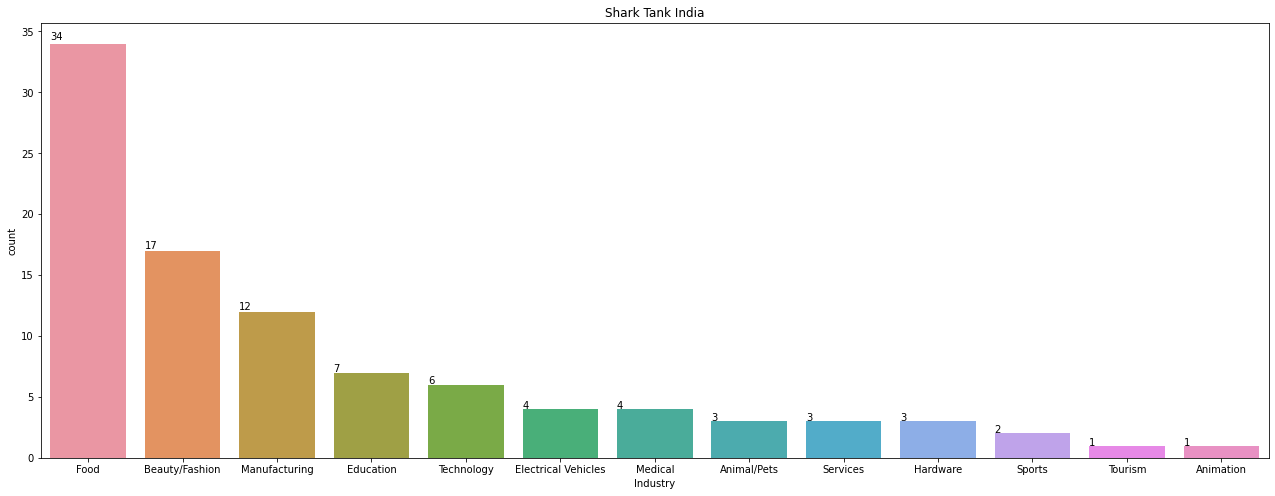

In [12]:
# Types of industries, came for pitching
print(shark_tank['Industry'].value_counts(), "\n")

fig = plt.figure(figsize=(22, 8))
ax = sns.countplot(x='Industry', data=shark_tank, order=shark_tank['Industry'].value_counts().index)
ax.set_title('Shark Tank India')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [13]:
print("Total presenters -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total male presenters -", int(shark_tank['Male Presenter'].sum()), "\n")
print(shark_tank['Male Presenter'].value_counts(), "\n")

print("Total female presenters -", int(shark_tank['Female Presenter'].sum()), "\n")
print(shark_tank['Female Presenter'].value_counts(), "\n")

Total presenters - 192 

Total male presenters - 134 

1.0    39
2.0    20
3.0    11
4.0     4
6.0     1
Name: Male Presenter, dtype: int64 

Total female presenters - 58 

1.0    40
2.0     6
3.0     2
Name: Female Presenter, dtype: int64 



1.0    78
0.0    22
Name: Received Offer, dtype: int64 

1.0    78%
0.0    22%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

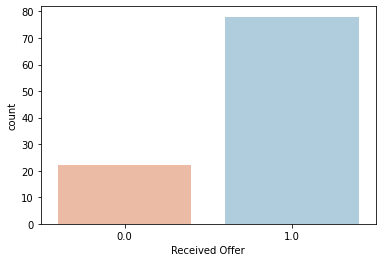

In [14]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='RdBu')

1.0    65
0.0    13
Name: Accepted Offer, dtype: int64 

1.0    83.0
0.0    17.0
Name: Accepted Offer, dtype: float64 



<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

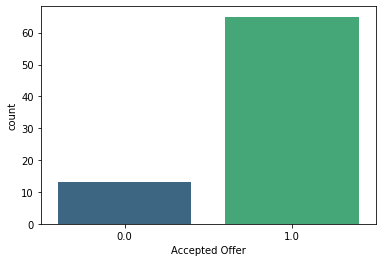

In [15]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
#print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

In [16]:
# Offers rejected by pitchers
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount"]]

,Startup Name,Original Ask Amount
6,qZense Labs,100.0
19,Torch-it,75.0
20,La Kheer Deli,50.0
26,Kabira Handmad,100.0
40,Morriko Pure Foods,100.0
54,India Hemp and Co,50.0
59,Keto India,150.0
69,Moonshine,80.0
70,Falhari,50.0
72,Urban Monkey,100.0


In [17]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹367.43 crores


In [18]:
# Sum of amount investmented by all sharks, in Shark Tank, in India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹38.32 crores


In [19]:
# Sum of loan/debt amount given by all sharks, in Shark Tank, in India
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹3.01 crores


In [20]:
# Top 15 investments, as per total investment/deal amount
shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15)

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
Kabaddi Adda            80.0
Name: Total Deal Amount, dtype: float64

In [21]:
# Top 10 investments, as per total equity/shares percentage
shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10)

Startup Name
Sid07 Designs               75.00
Booz Scooters               50.00
Isak Fragrances             50.00
Hammer Lifestyle            40.00
KG Agrotech                 40.00
The Sass Bar                35.00
Vivalyf Innovations         33.33
Gold Safe Solutions Ind.    30.00
Heart up my Sleeves         30.00
Jain Shikanji               30.00
Name: Total Deal Equity, dtype: float64

In [22]:
# Top 5 investments, as per total debt/loan amount
shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5)

Startup Name
Otua            99.0
Namhya Foods    50.0
Bamboo India    30.0
NOCD            30.0
PNT             25.0
Name: Total Deal Debt, dtype: float64

## Which shark invested most ?

In [23]:
# Maximum - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 7.52490016 crores


In [24]:
# Minimum - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 0.9499025249999999 crores


In [25]:
# Maximum - as per Equity
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 307.51 % in different companies


In [26]:
# Minimum - as per Equity
print("Ghazal got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Ghazal got equity of - 34.7 % in different companies


In [27]:
# Maximum - as per Debt/loaned Amount
print("Ashneer gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ashneer gave loan of - 1.14 crores


In [28]:
# Minimum - as per Debt/loaned Amount
print("Namita/Ghazal gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Namita/Ghazal gave loan of - 0.0 crores


# Ashneer Investments

In [29]:
# Ashneer
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]])

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Ashneer 4.49 crores
Equity received by Ashneer 72.41 % in different companies
Debt/loan amount by Ashneer 1.14 crores

             Startup Name             Industry  Ashneer Investment Amount
0          BluePine Foods                 Food                      25.00
1           Booz Scooters  Electrical Vehicles                      20.00
3              Tagz Foods                 Food                      70.00
15        Skippi Ice Pops                 Food                      20.00
18     Raising Superstars            Education                      50.00
21           Beyond Snack                 Food                      25.00
23          Motion Breeze  Electrical Vehicles                      30.00
29              EventBeep            Education                      10.00
38        The Yarn Bazaar        Manufacturing                      25.00
45           Bamboo India        Manufacturing                      25.00
49  Find Your Kicks India       Beauty/Fashion

# Namita Investments

In [30]:
# Namita
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

print("\n Namita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Namita 5.33 crores
Equity received by Namita 94.78 % in different companies
Debt/loan amount by Namita 0.0 crores

             Startup Name        Industry  Namita Investment Amount
11                 Bummer  Beauty/Fashion                 37.500000
15        Skippi Ice Pops            Food                 20.000000
16           Menstrupedia       Education                 50.000000
24                  Altor   Manufacturing                 25.000000
27                Nuutjob  Beauty/Fashion                  8.330000
32                  Farda  Beauty/Fashion                 15.000000
33                   Auli  Beauty/Fashion                 75.000000
36                  Annie       Education                 35.000000
39      The Renal Project         Medical                 50.000000
44                Cocofit            Food                  0.000016
47           Beyond Water            Food                 37.500000
49  Find Your Kicks India  Beauty/Fashion       

# Anupam Investments

In [31]:
# Anupam
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

print("\n Anupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Anupam 5.04 crores
Equity received by Anupam 155.52 % in different companies
Debt/loan amount by Anupam 0.15 crores

                Startup Name             Industry  Anupam Investment Amount
2        Heart up my Sleeves       Beauty/Fashion                 12.500000
9                     Cos IQ       Beauty/Fashion                 25.000000
12               Revamp Moto  Electrical Vehicles                 50.000000
15           Skippi Ice Pops                 Food                 20.000000
22       Vivalyf Innovations              Medical                 28.000000
28                  Meatyour                 Food                 10.000000
31  ARRCOAT Surface Textures        Manufacturing                 50.000000
35                      LOKA           Technology                 13.330000
36                     Annie            Education                 35.000000
37                Carragreen        Manufacturing                 25.000000
38           The Yarn Baza

# Vineeta Investments

In [32]:
# Vineeta
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

print("\n Vineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Vineeta 2.43 crores
Equity received by Vineeta 109.03 % in different companies
Debt/loan amount by Vineeta 0.3 crores

                Startup Name             Industry  Vineeta Investment Amount
0             BluePine Foods                 Food                      25.00
1              Booz Scooters  Electrical Vehicles                      20.00
2        Heart up my Sleeves       Beauty/Fashion                      12.50
8                       NOCD                 Food                      20.00
9                     Cos IQ       Beauty/Fashion                      25.00
15           Skippi Ice Pops                 Food                      20.00
64                Get-A-Whey                 Food                      33.33
66          The Quirky Naari       Beauty/Fashion                      17.50
79       Sunfox Technologies              Medical                      20.00
88                  Humpy A2                 Food                      33.33
90  Gold Safe

# Aman Investments

In [33]:
# Aman
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]])

print("\n Aman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Aman 7.52 crores
Equity received by Aman 148.07 % in different companies
Debt/loan amount by Aman 0.5 crores

             Startup Name             Industry  Aman Investment Amount
0          BluePine Foods                 Food               25.000000
7               Peeschute       Beauty/Fashion               75.000000
11                 Bummer       Beauty/Fashion               37.500000
12            Revamp Moto  Electrical Vehicles               50.000000
15        Skippi Ice Pops                 Food               20.000000
18     Raising Superstars            Education               50.000000
21           Beyond Snack                 Food               25.000000
24                  Altor        Manufacturing               25.000000
25                  Ariro        Manufacturing               25.000000
27                Nuutjob       Beauty/Fashion                8.330000
28               Meatyour                 Food               10.000000
29              E

# Peyush Investments

In [34]:
# Peyush
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]])

print("\n Peyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Peyush 6.95 crores
Equity received by Peyush 307.51 % in different companies
Debt/loan amount by Peyush 0.92 crores

                Startup Name        Industry  Peyush Investment Amount
22       Vivalyf Innovations         Medical                 28.000000
25                     Ariro   Manufacturing                 25.000000
27                   Nuutjob  Beauty/Fashion                  8.330000
28                  Meatyour            Food                 10.000000
29                 EventBeep       Education                 10.000000
35                      LOKA      Technology                 13.330000
36                     Annie       Education                 35.000000
37                Carragreen   Manufacturing                 25.000000
38           The Yarn Bazaar   Manufacturing                 25.000000
43                       PNT      Technology                 25.000000
49     Find Your Kicks India  Beauty/Fashion                 10.000000
50        

# Ghazal Investments

In [35]:
# Ghazal
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]])

print("\n Ghazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Ghazal 0.95 crores
Equity received by Ghazal 34.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

                Startup Name        Industry  Ghazal Investment Amount
75              The Sass Bar  Beauty/Fashion                 25.000000
79       Sunfox Technologies         Medical                 20.000000
85        Watt Technovations         Medical                  0.000253
88                  Humpy A2            Food                 33.330000
90  Gold Safe Solutions Ind.   Manufacturing                 16.660000

 Ghazal industry wise investments

Industry        Industry      
Medical         Medical           2
Beauty/Fashion  Beauty/Fashion    1
Food            Food              1
Manufacturing   Manufacturing     1
Name: Industry, dtype: int64


1.0    19
2.0    18
3.0    12
5.0     4
4.0     3
Name: Number of sharks in deal, dtype: int64 

1.0    34.0
2.0    32.0
3.0    21.0
5.0     7.0
4.0     5.0
Name: Number of sharks in deal, dtype: float64


<AxesSubplot:xlabel='Number of sharks in deal', ylabel='count'>

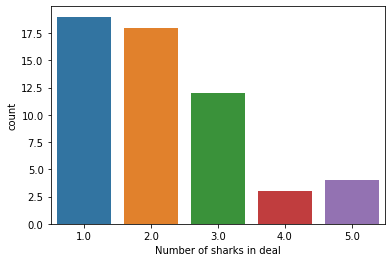

In [36]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
#print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100))

sns.countplot(data = shark_tank, x = 'Number of sharks in deal')

In [37]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] == 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


In [38]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              117 non-null    int64  
 1   Episode Number             117 non-null    int64  
 2   Episode Title              91 non-null     object 
 3   Pitch Number               117 non-null    int64  
 4   Startup Name               117 non-null    object 
 5   Industry                   97 non-null     object 
 6   Business Description       117 non-null    object 
 7   Number of Presenters       91 non-null     float64
 8   Male Presenter             75 non-null     float64
 9   Female Presenter           48 non-null     float64
 10  Started in                 16 non-null     float64
 11  Pitchers Home City         21 non-null     object 
 12  Yearly Revenue             28 non-null     float64
 13  Monthly Sales              51 non-null     float64

In [39]:
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
#print(text)
wordcloud = WordCloud(width = 2000, height = 1500, background_color='skyblue', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
#wordcloud = WordCloud(width = 2000, height = 1500, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2021).generate(text)
wordcloud.to_file("Shark_Tank_India_description1.png")

<img src="./Shark_Tank_India_description1.png">

In [40]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))


# numpy version: 1.20.3
# pandas version: 1.3.5
# matplotlib version: 3.5.1
# seaborn version: 0.11.2

numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2
